# Linear model analysis

In [1]:
# import relevant module
import openturns as ot
import otpod
# enable display figure in notebook
%matplotlib inline

### Generate data

In [2]:
N = 100
ot.RandomGenerator.SetSeed(123456)
defectDist = ot.Uniform(0.1, 0.6)
# normal epsilon distribution
epsilon = ot.Normal(0, 1.9)
defects = defectDist.getSample(N)
signalsInvBoxCox = defects * 43. + epsilon.getSample(N) + 2.5
# Inverse Box Cox transformation
invBoxCox = ot.InverseBoxCoxTransform(0.3)
signals = invBoxCox(signalsInvBoxCox)

### Run analysis without Box Cox

In [3]:
analysis = otpod.UnivariateLinearModelAnalysis(defects, signals)

### Get some particular results

In [23]:
print analysis.getIntercept()
print analysis.getR2()
print analysis.getKolmogorovPValue()

[Intercept for uncensored case : 4.02409]
[R2 for uncensored case : 0.894736]
[Kolmogorov p-value for uncensored case : 0.337199]


### Save all results in a csv file

In [4]:
analysis.saveResults('results.csv')

### Print all results of the linear regression and all tests on the residuals

A warning is printed because some residuals tests failed : the p-value is less than 0.5.

In [24]:
analysis.printResults()

--------------------------------------------------------------------------------
         Linear model analysis results
--------------------------------------------------------------------------------
Box Cox parameter :                                    0.22              
                                                                         
                                                 Uncensored              
                                                                         
Intercept coefficient :                                4.02              
Slope coefficient :                                   25.55              
Standard error of the estimate :                       1.34              
                                                                         
Confidence interval on coefficients                                      
Intercept coefficient :                        [3.33, 4.72]              
Slope coefficient :                           [23.80, 27.31

### Run analysis with Box Cox

In [6]:
analysis = otpod.UnivariateLinearModelAnalysis(defects, signals, boxCox=True)

### Print results of the linear regression and all tests on the residuals

In [7]:
analysis.printResults()

--------------------------------------------------------------------------------
         Linear model analysis results
--------------------------------------------------------------------------------
Box Cox parameter :                                    0.22              
                                                                         
                                                 Uncensored              
                                                                         
Intercept coefficient :                                4.02              
Slope coefficient :                                   25.55              
Standard error of the estimate :                       1.34              
                                                                         
Confidence interval on coefficients                                      
Intercept coefficient :                        [3.33, 4.72]              
Slope coefficient :                           [23.80, 27.31

## Print graphs
#### The linear regression model with data

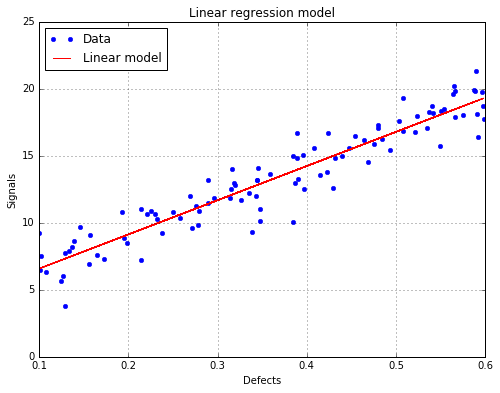

In [9]:
fig, ax = analysis.drawLinearModel(name='figure/linearModel.png') # save figure as png file
fig.show()

#### The residuals with respect to the defects

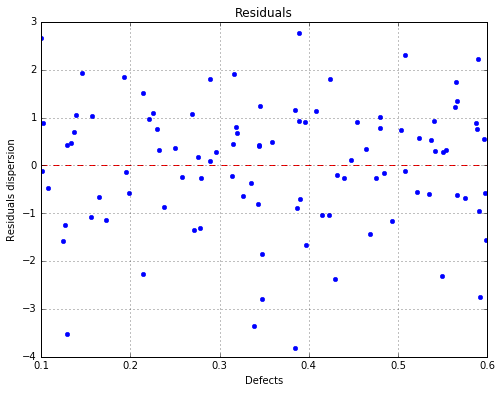

In [10]:
fig, ax = analysis.drawResiduals(name='figure/residuals.eps') # save figure as eps file
fig.show()

#### The fitted residuals distribution with the histogram

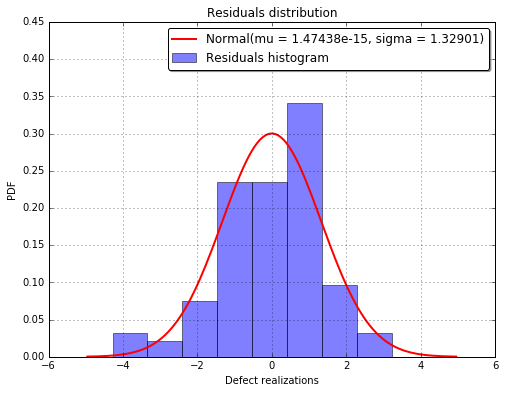

In [17]:
fig, ax = analysis.drawResidualsDistribution()
ax.set_ylim(ymax=0.45)
fig.show()
# The figure is saved after the changes
fig.savefig('figure/residualsDistribution.png', bbox_inches='tight')

#### The residuals QQ plot

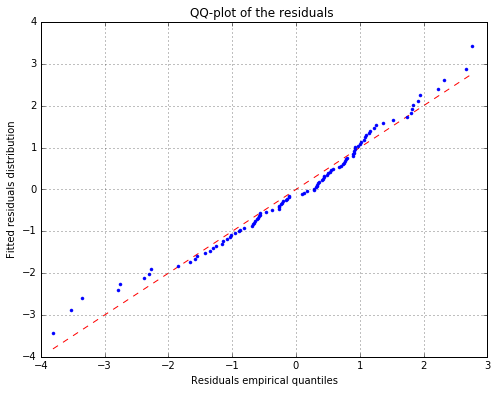

In [18]:
fig, ax = analysis.drawResidualsQQplot()
fig.set_size_inches(8, 6)
fig.show()

#### The Box Cox likelihood with respect to the defect

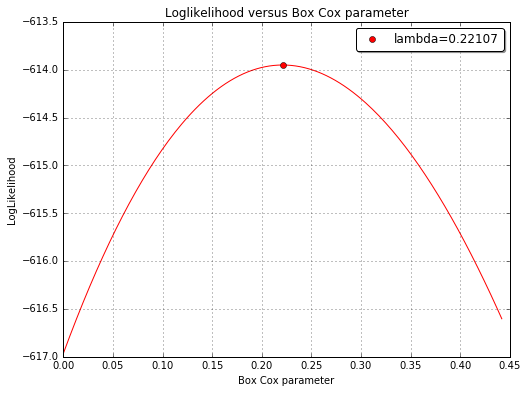

In [19]:
fig, ax = analysis.drawBoxCoxLikelihood(name='figure/BoxCoxlikelihood.png')
fig.set_size_inches(8, 6)
fig.show()